In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X = iris.data
X = pd.DataFrame(X,columns = iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# Step1. initiate a Mapper
tm = mapper.Mapper(verbose=1)
# Step2. Projection
lens = [Filter.MDS(components=[0, 1],random_state=100)]
projected_X = tm.filter(X, lens=lens)
clusterer = DBSCAN(eps=0.75, min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)

Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


/home/clare/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.


In [3]:
graph = tm.map(data=StandardScaler().fit_transform(X), cover=cover, clusterer=clusterer)

100%|██████████| 400/400 [00:00<00:00, 7103.36it/s]

Mapping on data (150, 4) using lens (150, 2)
...minimal number of points in hypercube to do clustering: 1
...create 197 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 913 edges.
Finish TDA mapping


In [4]:
print(len(graph.nodes),len(graph.edges))

197 913


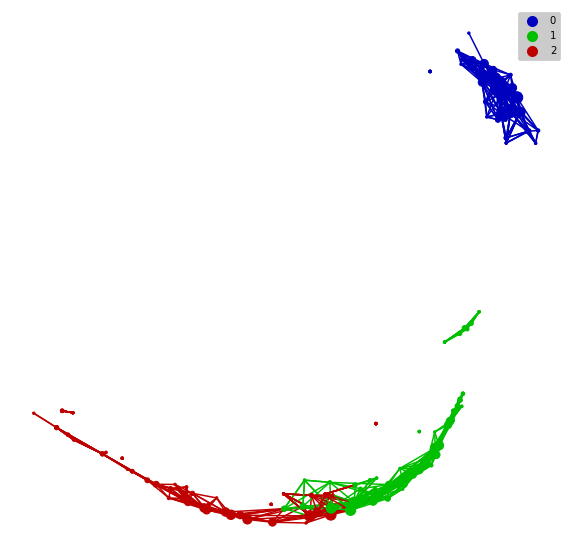

In [6]:
from tmap.tda.plot import Color
y = iris.target
color = Color(target=y, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

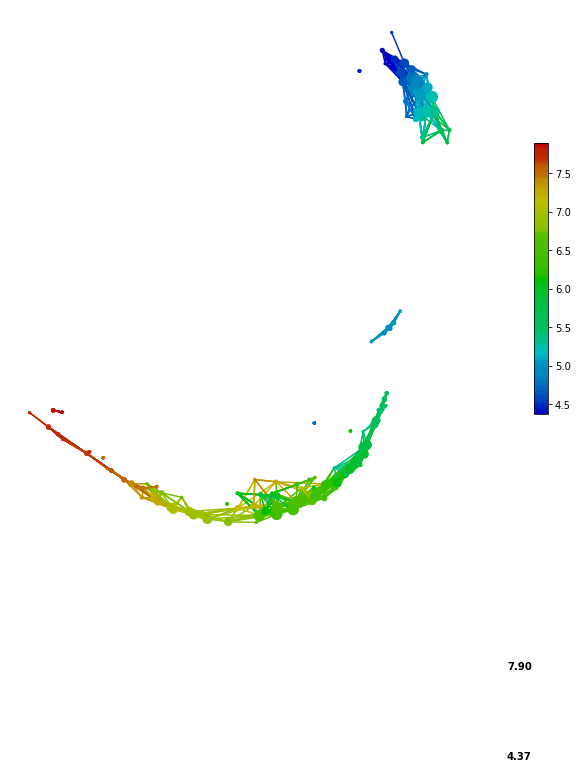

In [9]:
color = Color(target=X.iloc[:,0], dtype="numerical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15)

In [10]:
from tmap.tda.plot import vis_progressX, Color
color = Color(target=X.iloc[:,0], dtype="numerical")
vis_progressX(graph,simple=True,mode='file',color=Color(target=X.iloc[:,0], dtype="numerical"),filename='example1.html',auto_open=False)

/home/clare/anaconda3/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/home/clare/anaconda3/lib/python3.8/site-packages/numpy/core/numeric.py:2378: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [11]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


/home/clare/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

  0%|          | 0/400 [00:00<?, ?it/s]

Filtering has been completed.


100%|██████████| 400/400 [00:00<00:00, 1133.80it/s]


Mapping on data (1688, 17) using lens (1688, 2)
...minimal number of points in hypercube to do clustering: 1
...create 673 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 1127 edges.
Finish TDA mapping


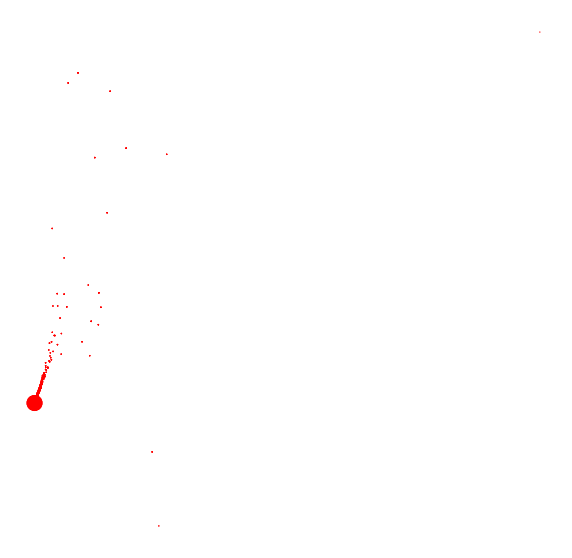

In [12]:
import pandas as pd
X = pd.read_csv('feature-table.tsv', sep='\t', header=0, index_col='#OTU ID')
from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Step 1 is to initiate Mapper
tm = mapper.Mapper(verbose=1)

# Step 2 is Projection
lens = [Filter.MDS(components=[0, 1],random_state=100)]
projected_X = tm.filter(X, lens=lens)
clusterer = DBSCAN(eps=0.75, min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)

graph = tm.map(data=StandardScaler().fit_transform(X), cover=cover, clusterer=clusterer)
graph.show(color='red', fig_size=(10,10), node_size=15)

In [1]:
iris

NameError: name 'iris' is not defined